Cулейманов Руслан к3141

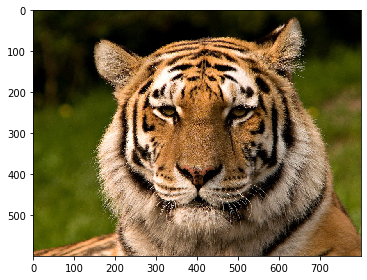

In [188]:
%matplotlib inline
from skimage.io import imread, imsave, imshow
from skimage import img_as_float,img_as_ubyte
from numpy import array_equal,histogram, clip, dstack
img = imread('https://stepik.org/media/attachments/lesson/60609/tiger-color.png')
imshow(img)

Считаем YUV каналы

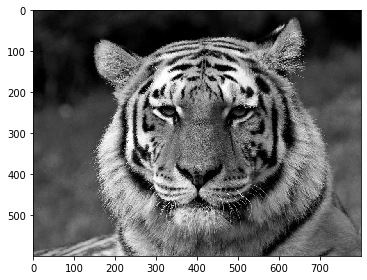

In [189]:
img_f = img_as_float(img)
r = img_f[:,:,0]
g = img_f[:,:,1]
b = img_f[:,:,2]
Y=0.2126*r+0.7152*g+0.0722*b
U=-0.0999*r-0.3360*g+0.4360*b
V=0.6150*r-0.5586*g-0.0563*b
imshow(Y)

Поиск минимума и максимумам через сортировку списка 

In [190]:
pix = Y.size
k = round(pix*0.05)
arrey = []
for i in Y:
    arrey.extend(i)
arrey.sort()
x_min = arrey[k+1]
x_max = arrey[-k-1]
print(x_max, x_min)

0.7923184313725489 0.011218823529411764


Линейное растяжение канала Y

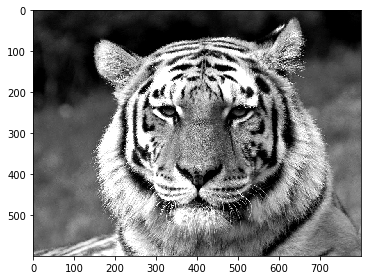

In [191]:
Y = clip((Y - x_min)/(x_max-x_min),0,1)
imshow(Y)

Перевод в RGB

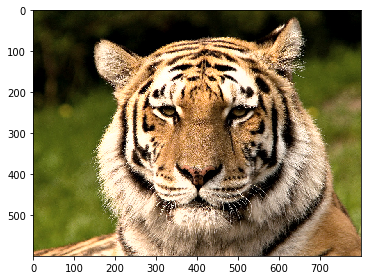

In [192]:
r = Y + 1.2803*V
g = Y - 0.2148*U-0.3805*V
b = Y + 2.1279*U
img = clip(dstack((r, g, b)),0,1)
img = img_as_ubyte(img)
imshow(img)

True


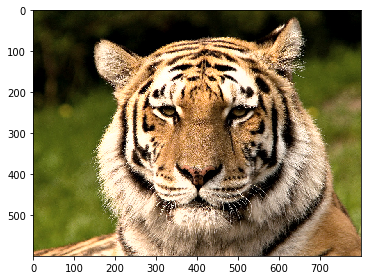

In [193]:
omg = imread('https://stepik.org/media/attachments/lesson/60609/tiger-stable-contrast.png')
imshow(omg)
print(array_equal(img, omg))